In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Analyzed_tweets.csv')

In [ ]:
df.head()

,Date,User,Tweet,sentiment
0,2023-01-30 23:56:38+00:00,Lord_Bogan,@radfembarbie @Slatzism @barneyxbt @number41_ ...,Negative
1,2023-01-30 23:49:39+00:00,saltyoldRN,"@DemforDeSantis Pro vaccine is one thing, mand...",Neutral
2,2023-01-30 23:44:51+00:00,JohnGil30224361,@stellalimelight @ACTBrigitte Old style pro ch...,Negative
3,2023-01-30 23:36:55+00:00,bzawi619,@eat_your_lasers @JoeBiden The court basically...,Negative
4,2023-01-30 23:35:23+00:00,sahbdeane,"@masterkiarie @AbbyJohnson Um. No.\n\nI am, an...",Positive


In [ ]:
df_sentiment = pd.DataFrame(df['sentiment'].value_counts())
df_sentiment


,sentiment
Negative,2151
Neutral,809
Positive,40


<AxesSubplot:>

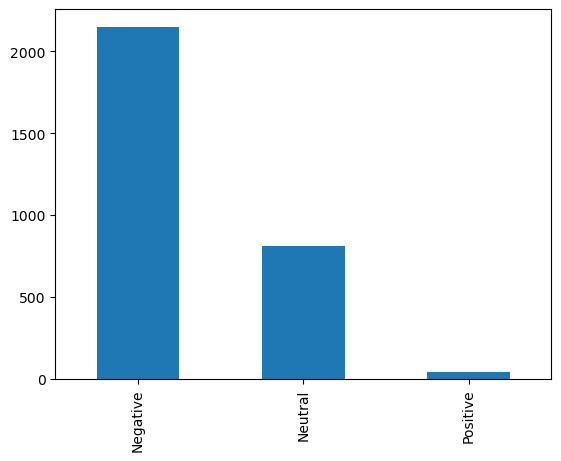

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')

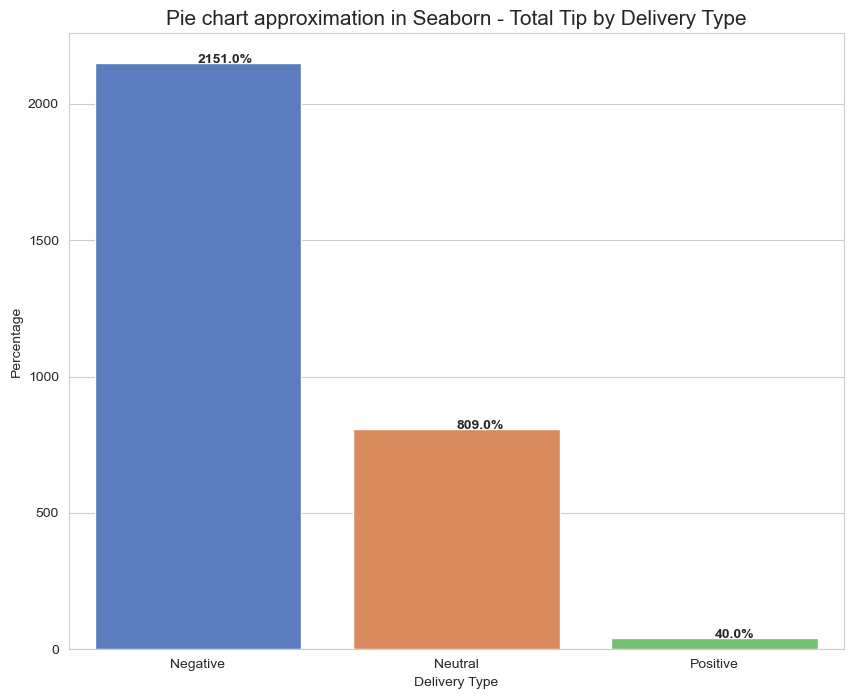

In [ ]:
#Seaborn barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=df_sentiment.index, y='sentiment', data=df_sentiment, ci=None, palette="muted", orient='v')
ax.set_title("Pie chart approximation in Seaborn - Total Tip by Delivery Type", fontsize=15)
ax.set_xlabel ("Delivery Type")
ax.set_ylabel ("Percentage")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )

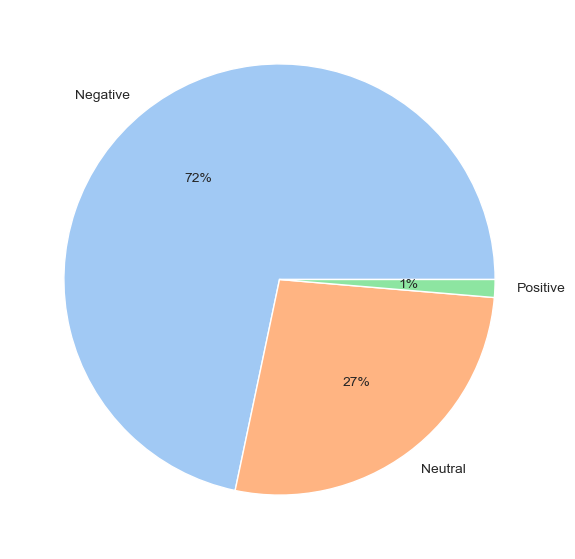

In [ ]:
# pie chart
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.pie(df_sentiment['sentiment'], labels = ['Negative', 'Neutral', 'Positive'], colors = colors, autopct='%.0f%%')
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()

In [ ]:
# generate the date column 
df['date'] = df['Date'].apply(lambda x: x.split(' ')[0])

Text(0.5, 1.0, 'Number of Tweets Every Day')

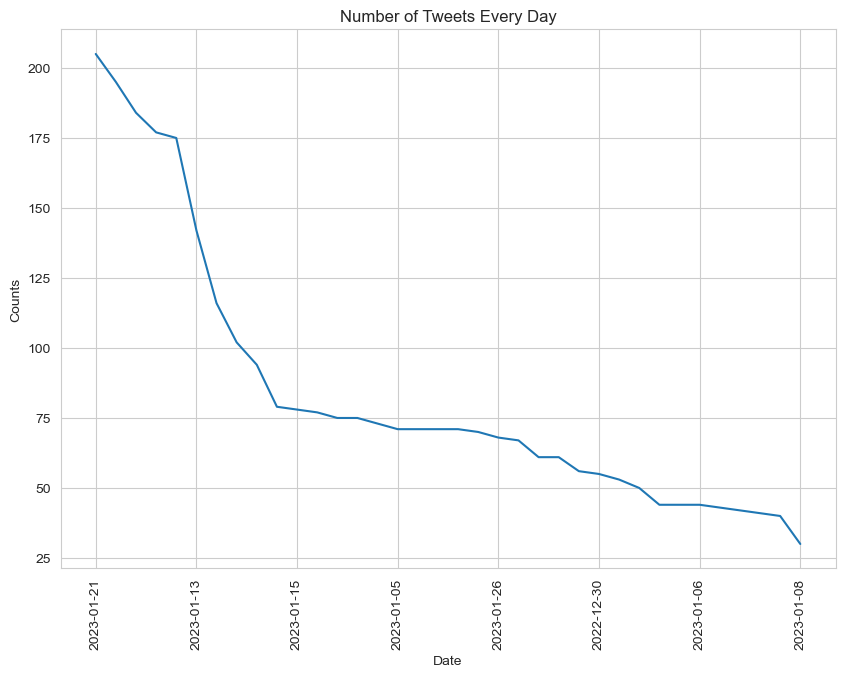

In [ ]:
# plot the number of tweets against date
df['date'].value_counts().plot(kind='line', rot=0, figsize=(10,7))
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Number of Tweets Every Day')

In [ ]:
# generate the dataframe of total counts and date
df_values_time = pd.DataFrame(df['date'].value_counts())
df_values_time.rename(columns={'date': 'count'}, inplace=True)
df_values_time['date'] = df_values_time.index

In [ ]:
# get specific counts for evry sentiment category
df_values_time['Negative'] = df_values_time['date'].apply(lambda x: len(df[(df['sentiment'] == 'Negative') & (df['date'] == x)]))
df_values_time['Neutral'] = df_values_time['date'].apply(lambda x: len(df[(df['sentiment'] == 'Neutral') & (df['date'] == x)]))
df_values_time['Positive'] = df_values_time['date'].apply(lambda x: len(df[(df['sentiment'] == 'Positive') & (df['date'] == x)]))
df_values_time.head()

,count,date,Negative,Neutral,Positive
2023-01-21,205,2023-01-21,141,59,5
2023-01-23,195,2023-01-23,137,57,1
2023-01-12,184,2023-01-12,145,37,2
2023-01-20,177,2023-01-20,128,46,3
2023-01-22,175,2023-01-22,130,42,3


In [ ]:
# calculate the proportion of each sentiment 
df_values_time['neg_per'] = df_values_time.apply(lambda row: row["Negative"] / row["count"], axis=1)
df_values_time['neu_per'] = df_values_time.apply(lambda row: row["Neutral"] / row["count"], axis=1)
df_values_time['pos_per'] = df_values_time.apply(lambda row: row["Positive"] / row["count"], axis=1)
df_values_time

,count,date,Negative,Neutral,Positive,neg_per,neu_per,pos_per
2023-01-21,205,2023-01-21,141,59,5,0.687805,0.287805,0.024390
2023-01-23,195,2023-01-23,137,57,1,0.702564,0.292308,0.005128
2023-01-12,184,2023-01-12,145,37,2,0.788043,0.201087,0.010870
2023-01-20,177,2023-01-20,128,46,3,0.723164,0.259887,0.016949
2023-01-22,175,2023-01-22,130,42,3,0.742857,0.240000,0.017143
2023-01-13,142,2023-01-13,112,30,0,0.788732,0.211268,0.000000
2023-01-24,116,2023-01-24,87,26,3,0.750000,0.224138,0.025862
2023-01-02,102,2023-01-02,67,34,1,0.656863,0.333333,0.009804
2023-01-25,94,2023-01-25,76,15,3,0.808511,0.159574,0.031915
2023-01-19,79,2023-01-19,57,20,2,0.721519,0.253165,0.025316


Text(0.5, 1.0, 'Sentiment Over Time')

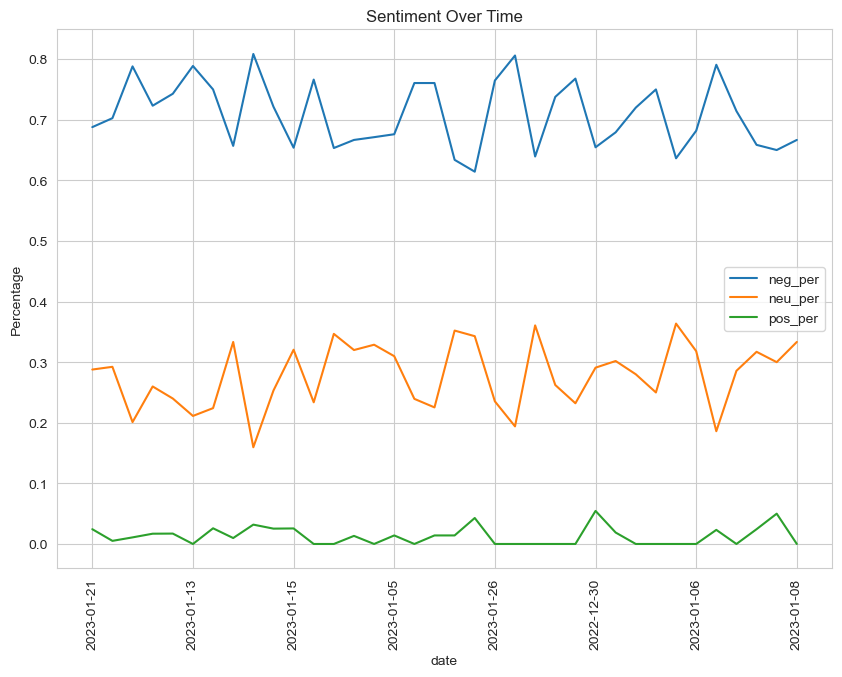

In [ ]:
# plot the proportion of each category over time
df_values_time[['date', 'neg_per', 'neu_per', 'pos_per']].plot(kind='line', figsize=(10,7))
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('Percentage')
plt.title('Sentiment Over Time')